# Real-world Data Wrangling

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
For this assessment, I will find and look at two datasets that evaluate the death rate from covid-19 for vaccinated people for the entire United States, compared to the city of Chicago. This analysis will show how hard the Covid-19 virus hit the city of Chicago and to what degree the vaccination truly aids in prevention. 

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

In [110]:
# Block for important imports

import zipfile
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### **Dataset 1**

Type: Covid-19 outcomes for the city of Chicago, CSV file.

Method: The data was gathered programmatically through the City of Chicago data.gov source.

Dataset variables:

*   Outcome
*   Week End
*   Age Group
*   Unvaccinated Rate
*   Vaccinated Rate
*   Boosted Rate
*   Crude Vaccinated Ratio

In [5]:
# Access data programmatically through a URl

# URL of dataset
url = 'https://data.cityofchicago.org/api/views/6irb-gasv/rows.csv?accessType=DOWNLOAD'

# Send GET request to the URL
response = requests.get(url)

# Check if request was successful
if response.status_code == 200:
    # Open file in write-binary
    with open('COVID-19_Outcomes_by_Vaccination_Status_-_Historical.csv', 'wb') as file:

        file.write(response.content)
        print('Data downloaded successfully!')
else: print(f"Failed to retrieve data. Status code: {response.status_code}")

Data downloaded successfully!


In [111]:
# Open the now downloaded data and place into a dataframe for further assessment.
df_chicago = pd.read_csv('COVID-19_Outcomes_by_Vaccination_Status_-_Historical.csv')
df_chicago.head()

,Outcome,Week End,Age Group,Unvaccinated Rate,Vaccinated Rate,Boosted Rate,Crude Vaccinated Ratio,Crude Boosted Ratio,Age-Adjusted Unvaccinated Rate,Age-Adjusted Vaccinated Rate,...,Age-Adjusted Vaccinated Ratio,Age-Adjusted Boosted Ratio,Population Unvaccinated,Population Vaccinated,Population Boosted,Outcome Unvaccinated,Outcome Vaccinated,Outcome Boosted,Age Group Min,Age Group Max
0,Deaths,10/01/2022,All,0.3,0.1,0.9,3.0,0.3,0.4,0.3,...,1.3,0.7,591822,842535.0,1037067.0,2,1.0,9.0,999,999
1,Deaths,07/09/2022,0-4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,0,NaN,NaN,0,4
2,Cases,11/12/2022,0-4,82.4,5.5,NaN,15.0,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,134,9.0,NaN,0,4
3,Hospitalizations,08/13/2022,0-4,7.4,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,12,0.0,NaN,0,4
4,Cases,02/26/2022,0-4,54.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,88,NaN,NaN,0,4


#### Dataset 2

Type: United states death rates for covid-19 csv file.

Method: The data was gathered by downloading the csv file and unzipping the zip file manually.

Dataset variables:

*   Entity (Age range)
*   Code
*   Day
*   unvaccinated
*   vaccinated_with
*   vaccinated_without

In [3]:
# Open the zip file and use the extractall 
##   method to open the contents of the file.
with zipfile.ZipFile("united-states-rates-of-covid-19-deaths-by-vaccination-status.zip","r") as zip_ref:
    zip_ref.extractall("https://lfcfwpjp2w.prod.udacity-student-workspaces.com/tree")

FileNotFoundError: [Errno 2] No such file or directory: 'united-states-rates-of-covid-19-deaths-by-vaccination-status.zip'

In [112]:
# Access the csv file by declaring the file path where it is located.
csv_file_path = '/workspace/https:/lfcfwpjp2w.prod.udacity-student-workspaces.com/tree/united-states-rates-of-covid-19-deaths-by-vaccination-status.csv'
# Open the csv file into a DataFrame.
df_us = pd.read_csv(csv_file_path)
df_us.head()

,Entity,Code,Day,unvaccinated,vaccinated_with,vaccinated_without
0,0.5-4,NaN,2022-08-06,0.096528,NaN,0.0
1,0.5-4,NaN,2022-08-13,0.019468,NaN,0.0
2,0.5-4,NaN,2022-08-20,0.000000,NaN,0.0
3,0.5-4,NaN,2022-08-27,0.079043,NaN,0.0
4,0.5-4,NaN,2022-09-03,0.039777,NaN,0.0


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [45]:
#Optional: store the raw data in your local data store

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [46]:
# Inspect the dataframe visually through the .head() and method
df_chicago.head()

,Outcome,Week End,Age Group,Unvaccinated Rate,Vaccinated Rate,Boosted Rate,Crude Vaccinated Ratio,Crude Boosted Ratio,Age-Adjusted Unvaccinated Rate,Age-Adjusted Vaccinated Rate,...,Age-Adjusted Vaccinated Ratio,Age-Adjusted Boosted Ratio,Population Unvaccinated,Population Vaccinated,Population Boosted,Outcome Unvaccinated,Outcome Vaccinated,Outcome Boosted,Age Group Min,Age Group Max
0,Deaths,10/01/2022,All,0.3,0.1,0.9,3.0,0.3,0.4,0.3,...,1.3,0.7,591822,842535.0,1037067.0,2,1.0,9.0,999,999
1,Deaths,07/09/2022,0-4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,0,NaN,NaN,0,4
2,Cases,11/12/2022,0-4,82.4,5.5,NaN,15.0,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,134,9.0,NaN,0,4
3,Hospitalizations,08/13/2022,0-4,7.4,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,12,0.0,NaN,0,4
4,Cases,02/26/2022,0-4,54.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,88,NaN,NaN,0,4


In [47]:
# Inspecting the dataframe programmatically
df_chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3753 entries, 0 to 3752
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Outcome                         3753 non-null   object 
 1   Week End                        3753 non-null   object 
 2   Age Group                       3753 non-null   object 
 3   Unvaccinated Rate               3753 non-null   float64
 4   Vaccinated Rate                 3426 non-null   float64
 5   Boosted Rate                    2529 non-null   float64
 6   Crude Vaccinated Ratio          2320 non-null   float64
 7   Crude Boosted Ratio             1761 non-null   float64
 8   Age-Adjusted Unvaccinated Rate  417 non-null    float64
 9   Age-Adjusted Vaccinated Rate    417 non-null    float64
 10  Age-Adjusted Boosted Rate       330 non-null    float64
 11  Age-Adjusted Vaccinated Ratio   380 non-null    float64
 12  Age-Adjusted Boosted Ratio      31

At a glance the main quality issyue that I can see within this dataset are missing values. There are several columns, such as the Age-Adjusted columns, within the data set that have a low value count as compared to the total number of entries. This typically indicates missing values.

### Quality Issue 2:

In [48]:
# Inspecting the dataframe visually
df_us.head(15)

,Entity,Code,Day,unvaccinated,vaccinated_with,vaccinated_without
0,0.5-4,NaN,2022-08-06,0.096528,NaN,0.0
1,0.5-4,NaN,2022-08-13,0.019468,NaN,0.0
2,0.5-4,NaN,2022-08-20,0.000000,NaN,0.0
3,0.5-4,NaN,2022-08-27,0.079043,NaN,0.0
4,0.5-4,NaN,2022-09-03,0.039777,NaN,0.0
5,0.5-4,NaN,2022-09-10,0.019981,NaN,0.0
6,0.5-4,NaN,2022-09-17,0.020094,NaN,0.0
7,0.5-4,NaN,2022-09-24,0.020941,NaN,0.0
8,0.5-4,NaN,2022-10-01,0.020300,NaN,0.0
9,0.5-4,NaN,2022-10-08,0.000000,NaN,0.0


In [49]:
# Inspecting the dataframe programmatically
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Entity              650 non-null    object 
 1   Code                0 non-null      float64
 2   Day                 650 non-null    object 
 3   unvaccinated        650 non-null    float64
 4   vaccinated_with     232 non-null    float64
 5   vaccinated_without  650 non-null    float64
dtypes: float64(4), object(2)
memory usage: 30.6+ KB


The main issue that I see is missing values. I have an entire column of NaN values and another with several hundred NaN values, resulting in what appears to be incomplete data. I also see inconsistency in the format of values in the Entity column. Altering the format will help align it with the other dataset for seemless merging.

>> I can also see that the format of values is inconsistent between the two datasets and will require altering to a more consistnet format. Columns such as Entity will need characters altered and column names will need adjusted.

### Tidiness Issue 1:

In [50]:
# Inspecting the dataframe visually for tidiness issues
df_chicago.head(20)

,Outcome,Week End,Age Group,Unvaccinated Rate,Vaccinated Rate,Boosted Rate,Crude Vaccinated Ratio,Crude Boosted Ratio,Age-Adjusted Unvaccinated Rate,Age-Adjusted Vaccinated Rate,...,Age-Adjusted Vaccinated Ratio,Age-Adjusted Boosted Ratio,Population Unvaccinated,Population Vaccinated,Population Boosted,Outcome Unvaccinated,Outcome Vaccinated,Outcome Boosted,Age Group Min,Age Group Max
0,Deaths,10/01/2022,All,0.3,0.1,0.9,3.0,0.3,0.4,0.3,...,1.3,0.7,591822,842535.0,1037067.0,2,1.0,9.0,999,999
1,Deaths,07/09/2022,0-4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,0,NaN,NaN,0,4
2,Cases,11/12/2022,0-4,82.4,5.5,NaN,15.0,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,134,9.0,NaN,0,4
3,Hospitalizations,08/13/2022,0-4,7.4,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,12,0.0,NaN,0,4
4,Cases,02/26/2022,0-4,54.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,88,NaN,NaN,0,4
5,Hospitalizations,12/11/2021,0-4,3.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,5,NaN,NaN,0,4
6,Hospitalizations,08/21/2021,80+,34.6,15.1,NaN,2.3,NaN,NaN,NaN,...,NaN,NaN,31765,52936.0,NaN,11,8.0,NaN,80,200
7,Deaths,02/04/2023,50-64,2.9,0.8,0.4,3.6,7.2,NaN,NaN,...,NaN,NaN,34169,125516.0,246849.0,1,1.0,1.0,50,64
8,Deaths,07/24/2021,80+,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32759,52117.0,NaN,0,0.0,NaN,80,200
9,Cases,11/20/2021,0-4,104.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,170,NaN,NaN,0,4


In [51]:
# Inspecting the dataframe programmatically
df_chicago.duplicated().sum()

0

In [52]:
# Check for null values within the data using .isnull().sum()
df_chicago.isnull().sum()

Outcome                              0
Week End                             0
Age Group                            0
Unvaccinated Rate                    0
Vaccinated Rate                    327
Boosted Rate                      1224
Crude Vaccinated Ratio            1433
Crude Boosted Ratio               1992
Age-Adjusted Unvaccinated Rate    3336
Age-Adjusted Vaccinated Rate      3336
Age-Adjusted Boosted Rate         3423
Age-Adjusted Vaccinated Ratio     3373
Age-Adjusted Boosted Ratio        3441
Population Unvaccinated              0
Population Vaccinated              540
Population Boosted                1224
Outcome Unvaccinated                 0
Outcome Vaccinated                 327
Outcome Boosted                   1224
Age Group Min                        0
Age Group Max                        0
dtype: int64

Tidiness issues that I can see within this dataset are a large amount of null values, and an inconsistent value format within the Age column. Some values are written as 0-4 and others as 80+. There is also a large number of columns that are irrelevant for the purpose of the analysis, thus they can be removed.

### Tidiness Issue 2: 

In [53]:
# Inspecting the dataframe visually
df_us.head(20)

,Entity,Code,Day,unvaccinated,vaccinated_with,vaccinated_without
0,0.5-4,NaN,2022-08-06,0.096528,NaN,0.0
1,0.5-4,NaN,2022-08-13,0.019468,NaN,0.0
2,0.5-4,NaN,2022-08-20,0.000000,NaN,0.0
3,0.5-4,NaN,2022-08-27,0.079043,NaN,0.0
4,0.5-4,NaN,2022-09-03,0.039777,NaN,0.0
5,0.5-4,NaN,2022-09-10,0.019981,NaN,0.0
6,0.5-4,NaN,2022-09-17,0.020094,NaN,0.0
7,0.5-4,NaN,2022-09-24,0.020941,NaN,0.0
8,0.5-4,NaN,2022-10-01,0.020300,NaN,0.0
9,0.5-4,NaN,2022-10-08,0.000000,NaN,0.0


In [54]:
# Inspecting the dataframe programmatically
df_us.isnull().sum()

Entity                  0
Code                  650
Day                     0
unvaccinated            0
vaccinated_with       418
vaccinated_without      0
dtype: int64

In [55]:
df_us.duplicated().sum()

0

For this dataset I can see that there are no duplicated values, but I have 2 columns with a large amount of null values. The Code column is unneccesary and can be removed.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [113]:
# Query the Chicago dataset so only data related to Deaths is left.
# Make copies of the datasets to ensure the raw dataframes 
# are not impacted.
covid_chicago = df_chicago.query('Outcome == "Deaths"').copy()
covid_deaths_us = df_us.copy()

### **Quality Issue 1: FILL IN**

In [114]:
# To address the missing value issue, I will replace any NaN values with 0.0.
covid_chicago.replace(np.nan, '0.0', inplace=True)

In [115]:
# Validate that there are no more NaN values within the dataset.
covid_chicago.isnull().sum()

Outcome                           0
Week End                          0
Age Group                         0
Unvaccinated Rate                 0
Vaccinated Rate                   0
Boosted Rate                      0
Crude Vaccinated Ratio            0
Crude Boosted Ratio               0
Age-Adjusted Unvaccinated Rate    0
Age-Adjusted Vaccinated Rate      0
Age-Adjusted Boosted Rate         0
Age-Adjusted Vaccinated Ratio     0
Age-Adjusted Boosted Ratio        0
Population Unvaccinated           0
Population Vaccinated             0
Population Boosted                0
Outcome Unvaccinated              0
Outcome Vaccinated                0
Outcome Boosted                   0
Age Group Min                     0
Age Group Max                     0
dtype: int64

Justification: By converting any NaN values to 0.0, this creates a complete data set and will allow for future calculations to be done without encountering errors. The replaced value will also have no impact on statistical data such as the mean.

### **Quality Issue 2: FILL IN**

In [116]:
# Eliminate NaN values to prevent errors during analysis
## Replace the NaN values with 0.0.
covid_deaths_us.replace(np.nan, '0.0', inplace=True)

In [117]:
# Convert the Entity column values to a consistent format for future merging.
## Changing the 0.5-4 to 0-4 and changing All ages to simply All,
## will align it with my other dataset.
## Renaming the Entity column to match the other data set will also make things simpler.
# Renaming the other columns inorder to have clear distinction between datasets once merged.
covid_deaths_us['Entity'].replace('0.5-4', '0-4', inplace=True)
covid_deaths_us['Entity'].replace('All ages', 'All', inplace=True)
covid_deaths_us.rename(columns={'Entity':'Age Group'}, inplace=True)
covid_deaths_us.rename(columns={'unvaccinated':'unvac_us'}, inplace=True)
covid_deaths_us.rename(columns={'vaccinated_with':'vaccinated_boost_us'}, inplace=True)
covid_deaths_us.rename(columns={'vaccinated_without':'vaccinated_no_boost_us'}, inplace=True)

In [118]:
# Verify that the NaN values are gone and 0.0 has filled the empty cells.
covid_deaths_us.isnull().sum()

Age Group                 0
Code                      0
Day                       0
unvac_us                  0
vaccinated_boost_us       0
vaccinated_no_boost_us    0
dtype: int64

In [119]:
covid_deaths_us.head(20)

,Age Group,Code,Day,unvac_us,vaccinated_boost_us,vaccinated_no_boost_us
0,0-4,0.0,2022-08-06,0.096528,0.0,0.0
1,0-4,0.0,2022-08-13,0.019468,0.0,0.0
2,0-4,0.0,2022-08-20,0.000000,0.0,0.0
3,0-4,0.0,2022-08-27,0.079043,0.0,0.0
4,0-4,0.0,2022-09-03,0.039777,0.0,0.0
5,0-4,0.0,2022-09-10,0.019981,0.0,0.0
6,0-4,0.0,2022-09-17,0.020094,0.0,0.0
7,0-4,0.0,2022-09-24,0.020941,0.0,0.0
8,0-4,0.0,2022-10-01,0.020300,0.0,0.0
9,0-4,0.0,2022-10-08,0.000000,0.0,0.0


Justification: Replacing the NaN values will allow for a smoother process once calculations begin, as calculations cannot be done on NaN values. Replacing 0.5 with 0 and All ages with All aligns this set with my other set in terms of value format, allowing for merging on the Age columns.

### **Tidiness Issue 1: FILL IN**

In [120]:
# This data set has a plethora of unneccesary columns that need removed.
## Drop the columns directly following index 5 as they are not needed.
covid_chicago.drop(['Week End', 'Unvaccinated Rate', 'Vaccinated Rate', 'Boosted Rate', 'Crude Vaccinated Ratio', 'Crude Boosted Ratio', 'Age-Adjusted Unvaccinated Rate', 'Age-Adjusted Vaccinated Rate',
                    'Age-Adjusted Boosted Rate', 'Age-Adjusted Vaccinated Ratio', 'Age-Adjusted Boosted Ratio', 'Outcome Unvaccinated', 'Population Boosted',
                    'Outcome Vaccinated', 'Outcome Boosted', 'Age Group Min', 'Age Group Max'], axis=1, inplace=True)

In [121]:
# Convert the datatype of Population Vaccinated from object to float
covid_chicago['Population Vaccinated'] = covid_chicago['Population Vaccinated'].astype(float)

In [122]:
#FILL IN - Validate the cleaning was successful
covid_chicago.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1242 entries, 0 to 3751
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Outcome                  1242 non-null   object 
 1   Age Group                1242 non-null   object 
 2   Population Unvaccinated  1242 non-null   int64  
 3   Population Vaccinated    1242 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 48.5+ KB


Justification: Removing the unneeded columns will allow for a more clear and precise data set, without all the excess noise to water down the answers I am looking for. After eliminating the columns the data type of Population Vaccinated turned from float to object. I converted it to float to prevent conflicts in the future.

### **Tidiness Issue 2: FILL IN**

In [123]:
# To tidy up this data set I need to remove the Code column as it provides no value to the completeness of the table.
## I can also remove the Day column as I am not concerned with the precise day an event occurred.
covid_deaths_us.drop(['Code', 'Day'], axis=1, inplace=True)
# Change the datatype for the vaccinated boost column to float for graphing purposes.
covid_deaths_us['vaccinated_boost_us'] = covid_deaths_us['vaccinated_boost_us'].astype(float)

In [124]:
# Verify that the proper columns have been removed from the data set.
covid_deaths_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age Group               650 non-null    object 
 1   unvac_us                650 non-null    float64
 2   vaccinated_boost_us     650 non-null    float64
 3   vaccinated_no_boost_us  650 non-null    float64
dtypes: float64(3), object(1)
memory usage: 20.4+ KB


Justification: By removing the Code column and Day column I have reduced the data set to consist of purely the age groups and vaccinated/unvaccinated populations. This information will be beneficial in the comparison between the U.S. and the city of Chicago.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [139]:
# Remove unnecessary variables and combine datasets
cleaned_data = pd.merge(covid_chicago, covid_deaths_us, on='Age Group')
cleaned_data.head()

,Outcome,Age Group,Population Unvaccinated,Population Vaccinated,unvac_us,vaccinated_boost_us,vaccinated_no_boost_us
0,Deaths,All,591822,842535.0,13.385740,0.0,0.807487
1,Deaths,All,591822,842535.0,12.270913,0.0,0.779669
2,Deaths,All,591822,842535.0,10.382004,0.0,0.697322
3,Deaths,All,591822,842535.0,10.128467,0.0,0.679107
4,Deaths,All,591822,842535.0,10.839916,0.0,0.772687


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [126]:
# Save data to a SQL database
import sqlite3

conn = sqlite3.connect('covid_deaths.db') # Create connection to the database
# Save the dataframe to the newly created database
cleaned_data.to_sql(name='Covid Deaths', con=conn, if_exists='replace', index=False)
conn.close()

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* How many deaths occured from Covid-19 in the city of Chicago as compared to the U.S. as a whole, while having been vaccinated?

1519169.0


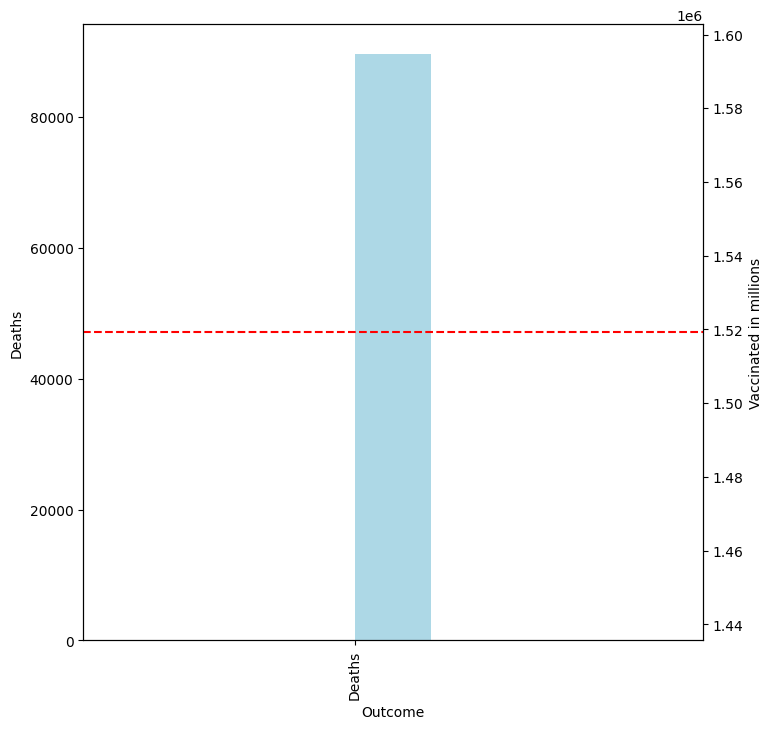

In [140]:
# Create a visual to show the relation between Covid deaths by vaccinated individuals.
x = cleaned_data['Outcome'].value_counts() # Declare the x axis variable

fig, ax1 = plt.subplots(figsize=(8,8)) # Set up figure and axis

# Create the bar chart
x.plot(kind='bar', ax=ax1, color='lightblue', position=0, width=0.07)
ax1.set_ylabel('Deaths')
ax1.tick_params(axis='y')

# Create 2nd axis
ax2 = ax1.twinx()

# Assign the threshold value with the Vaccinated Population and create the line plot
threshold_value = cleaned_data['Population Vaccinated'].max()
ax2.axhline(y=threshold_value, color='red', linestyle='--', label='Vaccinated')
ax2.set_ylabel('Vaccinated in millions')
ax2.tick_params(axis='y')
print(threshold_value)
plt.show;

*Answer to research question:* This visual shows the comparison between total deaths in Chicago to its total population of vaccinated individuals. With the number of vaccinated peoples being 1.5 million, the amount of deaths is small comparatively, leading me to believe the vaccine did infact aid in the prevention of the disease.

46.959114527


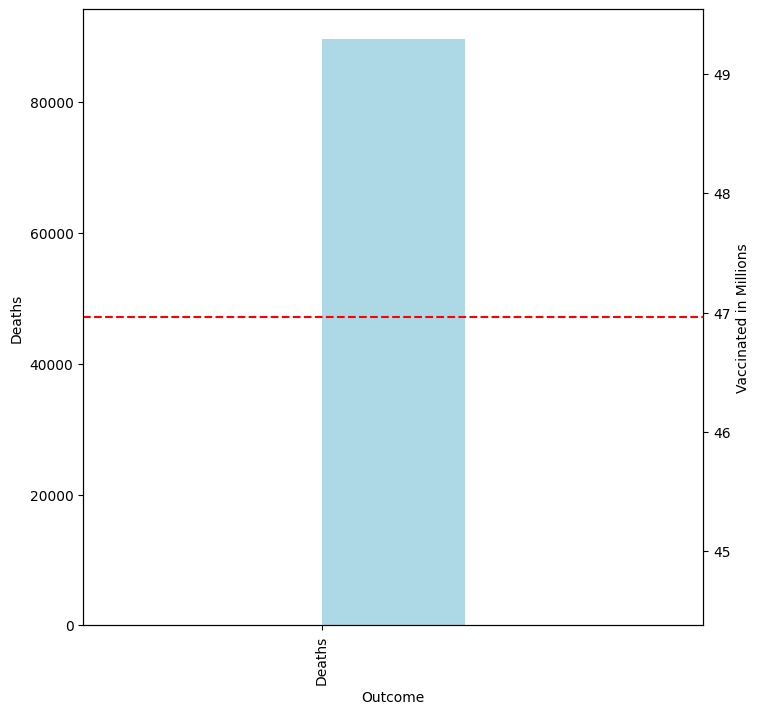

In [138]:
#Visual 2
x = cleaned_data['Outcome'].value_counts() # Declare the x axis variable

fig, ax1 = plt.subplots(figsize=(8,8)) # Set up figure and axis

# Create the bar chart
x.plot(kind='bar', ax=ax1, color='lightblue', position=0, width=0.15)
ax1.set_ylabel('Deaths')
ax1.tick_params(axis='y')

# Create 2nd axis
ax2 = ax1.twinx()

# Assign the threshold value with the Vaccinated Population and create the line plot
threshold_value =(cleaned_data['vaccinated_boost_us'].max() + cleaned_data['vaccinated_no_boost_us'].max())
ax2.axhline(y=threshold_value, color='red', linestyle='--', label='Vaccinated in millions')
ax2.set_ylabel('Vaccinated in Millions')
ax2.tick_params(axis='y')
print(threshold_value)
plt.show;

*Answer to research question:* Here I can see that the amount of deaths for vaccinated individuals in the US as a whole sits at roughly 47 million as compared to Chicago's 89700, showing that Chicago, while had many deaths, was not as affected by the disease as other locations may have been.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* Had there been more time to complete the project I would have certainly done a more thorough cleaning of the data as there are numerous formatting and quality issues that could be addressed, such as moving decimal places for accuarte value representation. Granted I had to go to clean the data to a certain extent simply to be able to produce the visuals needed. A more in depth dive into the effectivness of the covid vaccination amongst the population could be done in order to see just how well it prevented the disease. I also would have dug deeper into the true meaning behind each variable from both datasets as there were many that may have been useful, but at a glance were not.